<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Examens/20220701_Repesca_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: 2º parcial (programación) 01/07/2022**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen. 
*   Renombra esa copia como usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*) 
*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu examan) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/8HhV). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen se realiza de forma individual.
*   El horario es de 13h a 16h. No se aceptarán entregas pasada esa hora.
*   Podéis consultar apuntes, entregas o usar internet para buscar información, pero **NO** comunicaros entre vosotros/as.
*   Si te presentas al 1er y 2o parcial, debes realizar sólo el Ejercicio 1 de este examen.

<hr>

## **EXAMEN**

In [1]:
# Ejecuta esta parte de código para importar librerías comunes (añade las que creas necesarias a esta lista)

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from matplotlib import ticker, cm
from collections import Counter

<font color='green'>**> Ejercicio #1 [5 puntos]**</font>

En este problema vamos a aplicar el concepto de una [regresión lineal simple](https://realpython.com/linear-regression-in-python/#simple-linear-regression) para ajustar una serie de puntos a la curva descrita por:

$$
f(x) = A_0 \cdot x \cdot \sin(x+\theta_0)
$$

es decir que vamos a evaluar los parámetros $A_0$ y $\theta_0$ que mejor se ajusten a los puntos que proporcionamos, basado en un método de minimización de la [suma de los residuales al cuadrado](https://realpython.com/linear-regression-in-python/#problem-formulation) (SSR). Los residuales no son más que la diferencia entre los valores en $y_i$ de nuestra muestra, y los valores de la función de test evaluada en los $x_i$. Recuerda que tenemos unos pares de n-puntos $(x_i,y_i)$. La función de test que mejor se ajuste será aquella que minimize esas distancias (similar el método Kolmogórov visto en clase...). Vamos allá!

In [2]:
# Los pares de puntos a considerar son:

xr = [0.0, 1.1, 2.2, 3.3, 4.4, 5.6, 6.7, 7.8, 8.9, 10.0]
yr = [-0.1, 0.3, 0.2, -0.6, -0.9, -0.3, 1.3, 1.8, -0.3, -2.1]

**1.1 [0.5 puntos]:** Haz una gráfica de los puntos ($x_r$, $y_r$).

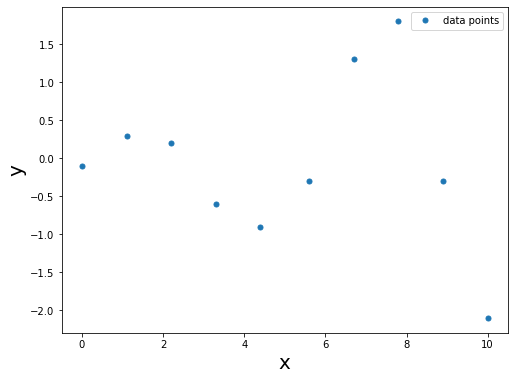

In [3]:
plt.figure(figsize=(8,6))
plt.plot(xr,yr,'.',markersize=10,label='data points')
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)
plt.legend(loc='best')
plt.show()

**1.2 [0.5 puntos]:** Define una función que tome como parámetros una $A$, una $\theta$, y nuestros puntos ($x_r$,$y_r$) y nos devuelva la suma de los residuales al cuadrado (SSR).

In [4]:
def get_ssr(A,theta,x,y):
  ftest = lambda x: A*np.sin(x+theta)*x
  d = ftest(x)
  ssr=0
  for e in range(0,len(d)):
    ssr+=(d[e]-y[e])**2
  return ssr

a=np.linspace(0,1,4)
get_ssr(a[3],a[3],xr,yr) # Check

129.42140058380357

**1.3 [1.5 puntos]:** Considera 500 puntos de test entre 0 y 1, tanto para el parámetro $A$ como para $\theta$. Usaremos estos puntos para evaluar los SSR y buscar así para qué valor de los parámetros $A$ y  $\theta$ tenemos el mínimo del SSR. Esos serán los valores óptimos $A_0$ y $\theta_0$ que mejor se ajusta a nuestros puntos.

Usando este método, calcula los valores óptimos de $A_0$ y $\theta_0$.

In [5]:
t = np.linspace(0,1,500) 
a = np.linspace(0,1,500)

d2lim=1e5 # Definimos unos valores óptimos fuera del rango, porque los modificaremos

for ti in t:
  for ai in a:
    d2=get_ssr(ai,ti,xr,yr)
    if (d2 < d2lim):
      t_op = ti
      a_op = ai
      d2lim = d2

print("A_0:",a_op, "- T_0:", t_op)

A_0: 0.24048096192384769 - T_0: 0.5731462925851702


**1.4 [1.5 puntos]:** Define una malla de 500 puntos de test entre 0 y 1, tanto para el parámetro $A$ como para $\theta$. Usaremos esa malla de puntos para evaluar los SSR y buscar así para qué valor de los parámetros $A$ y  $\theta$ tenemos el mínimo del SSR. Esos serán los valores óptimos $A_0$ y $\theta_0$ que mejor se ajusta a nuestros puntos.

Haz un scan, encuentra el punto óptimo, determina y muestra por pantalla $A_0$ y $\theta_0$ y haz una [gráfica tipo contour](https://www.adeveloperdiary.com/data-science/how-to-visualize-gradient-descent-using-contour-plot-in-python/) que muestre todos los resultados sobre el plano $(A,\theta)$, allí se verá donde está el mínimo del SSR.

Podemos usar $np.meshgrid$ para definir la malla:

```
t = np.linspace(0,1,500) 
a = np.linspace(0,1,500)
X, Y = np.meshgrid(a, t)
```

Luego tendrás que evaluar los SRR, pero ojo, que tendrá que ser una lista de listas (al igual que el meshgrid) para poder luego hacer la gráfica tipo contour, que tendrá una pinta similar a:

```
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, 100 ,locator=ticker.LogLocator())
plt.colorbar()
plt.show()
```



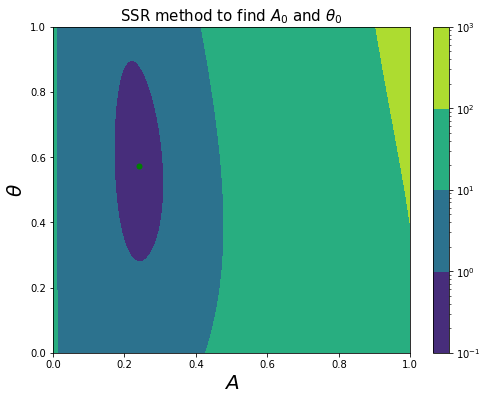

A_0: 0.24048096192384769 - T_0: 0.5731462925851702


In [6]:
t = np.linspace(0,1,500)
a = np.linspace(0,1,500)

d2lim=1e5

X, Y = np.meshgrid(a, t)

Z = []
for ti in t:
  z=[]
  for ai in a:
    d2=get_ssr(ai,ti,xr,yr)
    z.append(d2)
    if (d2 < d2lim):
      tm = ti
      am = ai
      d2lim = d2
  Z.append(z)

plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, 100 ,locator=ticker.LogLocator())
plt.colorbar()
plt.title(r"SSR method to find $A_0$ and $\theta_0$",size=15)
plt.xlabel(r"$A$",size=20)
plt.ylabel(r"$\theta$",size=20)
x=[0.24048096192384769] # J. Flix
y=[0.5731462925851702] # J. Flix
plt.plot(x,y,'g.',markersize=10) # J. Flix: mostrar el mínimo en la gráfica
plt.show()

print("A_0:",am, "- T_0:", tm)

**1.5 [1 punto]:** Haz una gráfica de los pares de puntos ($x_r$,$y_r$) y dibuja también la curva que mejor ajusta a los puntos, es decir $f(x) = A_0 \cdot x \cdot \sin(x+\theta_0)$, con los valores de $A_0$ y $\theta_0$ obtenidos en el apartado 1.3 o 1.4.



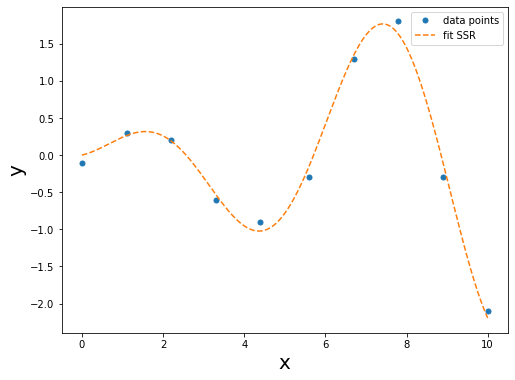

In [7]:
ftest = lambda x: am*np.sin(x+tm)*x

xp = np.linspace(0,10,1000)
yp = ftest(xp)

plt.figure(figsize=(8,6))
plt.plot(xr,yr,'.',markersize=10,label='data points')
plt.plot(xp,yp,'--',label='fit SSR')
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)
plt.legend(loc='best')
plt.show()

## <font color='green'>**> Ejercicio #2 [5 puntos]**</font>

Te dispones a realizar una prueba de mucho riesgo: desde el reposo, debes acelerar a tope un coche hasta llegar a una señal, donde dejarás de acelerar y empezarás a frenar para no caer por un acantilado que tienes ante ti... :( La figura te muestra las distancias que recorres hasta la señal, tamaño del coche, donde está el acantilado, y la distancia a la que se encuentra un barco con una colchoneta gigante que te puede salvar la vida si caes por el acantilado... La figura no está a escala!

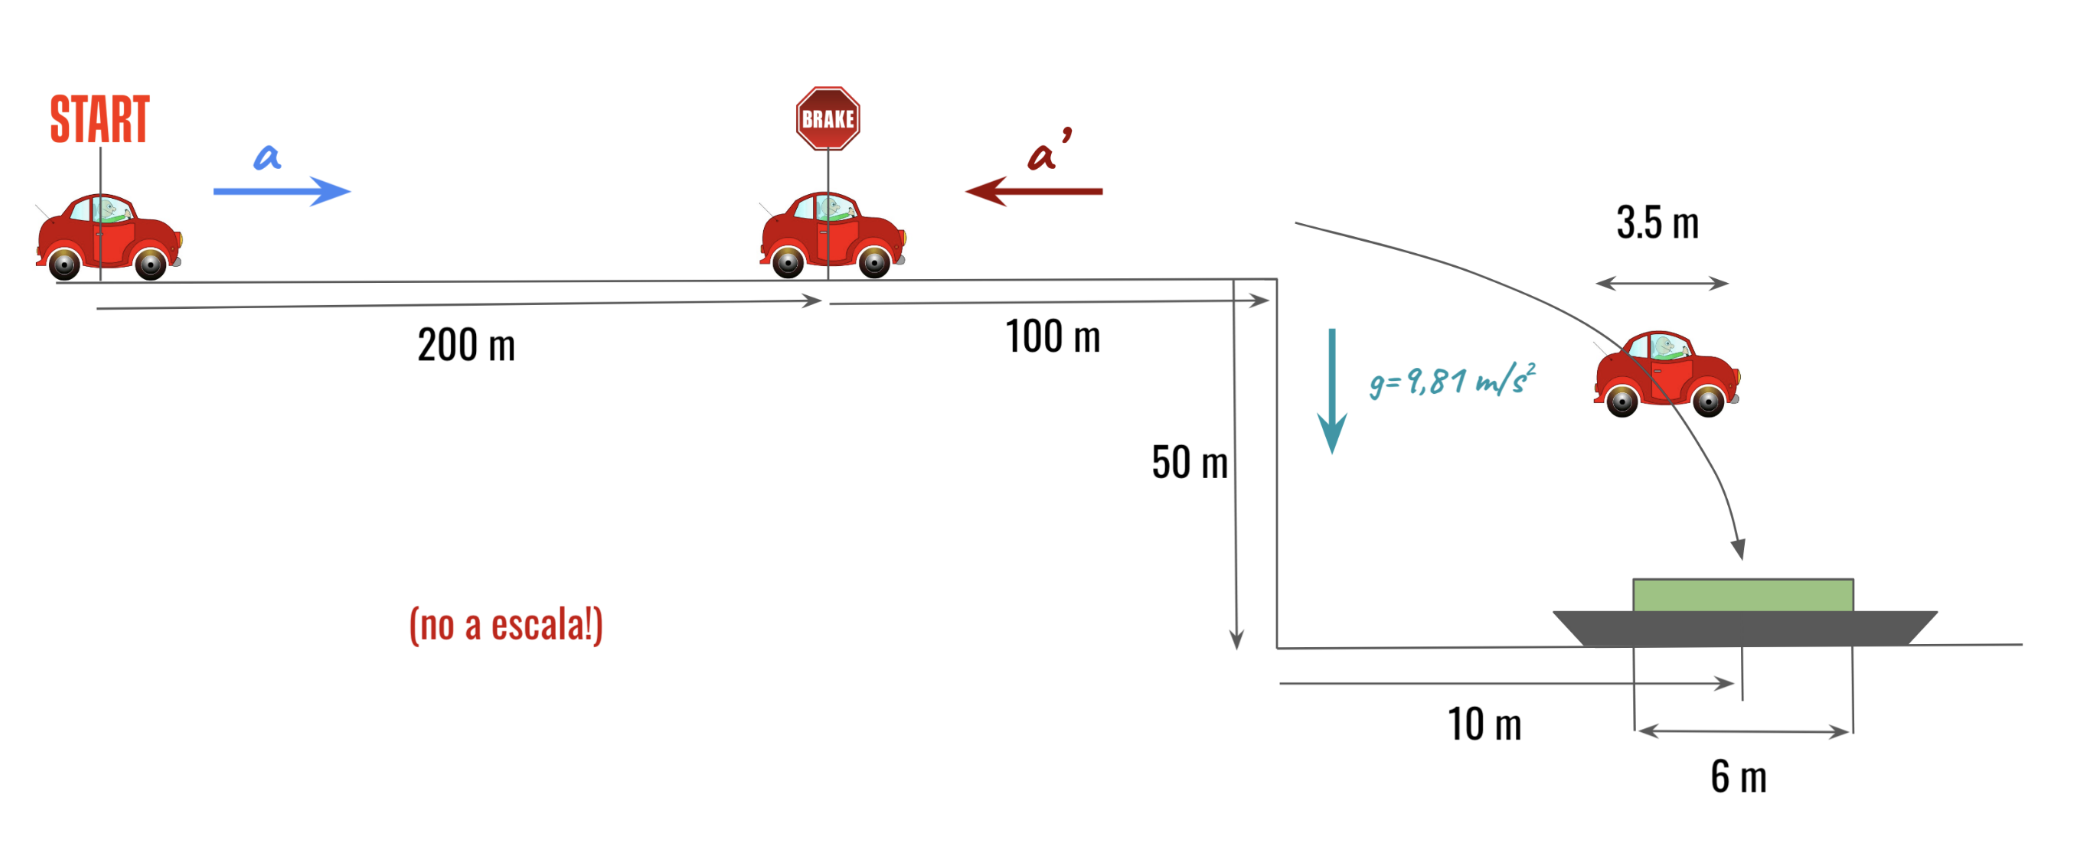

**2.1 [1.5 puntos]:** Partiendo del reposo, si aceleras a 2.85 $m/s^2$ hasta la señal de frenar, y allí frenas de forma constante a 5.65 $m/s^2$, calcula si caes por el acantilado o no, y si el coche cae encima de la colchoneta del barco o no.



In [8]:
# Ejercicio 2.1

a1 = 2.85 # Acceleració part inicial
a2 = -5.65 # Desacceleració frenada

x_brake = 200 # Distància a la frenada

# 2as = v^2 - v^2_0
v_brake = np.sqrt(2*a1*x_brake)
# v = at
t_brake = v_brake/a1

print("-")
print("El cotxe arriba al cartell de frenada en {0:.2f} s a una velocitat de {1:.2f} m/s ({2:.2f} km/h)".format(t_brake,v_brake,v_brake*3600/1000))
print("-")

# Anem a trobar el temps que triga en arribar al penyasegat

# 2as = v^2 - v^2_0
if (2*a2*100 + v_brake**2) <= 0: 
  print("el cotxe no cau pel penyasegat")
else:
  v_final = np.sqrt(2*a2*100 + v_brake**2)
  # v = at
  t_final = (v_final-v_brake)/(a2)
  print("-")
  print("El cotxe arriba al precipici en uns {0:.2f} s a una velocitat de {1:.2f} m/s ({2:.2f} km/h)".format(t_final+t_brake,v_final,v_final*3600/1000))
  print("-")
  t_vaixell = np.sqrt(2*50/9.81)
  x_aigua = v_final*t_vaixell
  print("-")
  print("El cotxe triga en caura a l'aigua uns {0:.2f} s, a una distancia del penyasegat de {1:.2f} m)".format(t_vaixell,x_aigua))
  if ( (x_aigua +3.5/2 <= 13) and (x_aigua - 3.5/2 >= 7)):
    print("El cotxe cau sobre el vaixell")
  print("-")

-
El cotxe arriba al cartell de frenada en 11.85 s a una velocitat de 33.76 m/s (121.55 km/h)
-
-
El cotxe arriba al precipici en uns 17.26 s a una velocitat de 3.16 m/s (11.38 km/h)
-
-
El cotxe triga en caura a l'aigua uns 3.19 s, a una distancia del penyasegat de 10.10 m)
El cotxe cau sobre el vaixell
-


**2.2 [2 puntos]:** De hecho, no eres la primera persona que hace esta prueba. Llegas al lugar y en el parking hay 10000 vehículos a escoger. Te dicen que aceleran a unos 2.85 m/s^2 y frenan a 5.65 m/s^2, pero con un error relativo del 15%, siguiendo unas distribuciones normales centradas en esos valores. Si te quedas mirando las pruebas de estos 10000 vehículos, 
 cuantos caerán encima de la colchoneta y fuera de ella? Este valor fluctúa mucho si repites la experiencia?

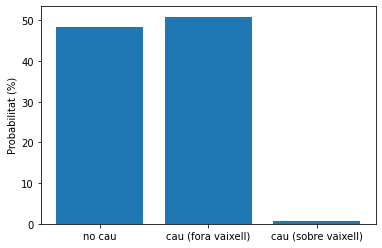

[48.33, 50.91, 0.76]
fluctua


In [9]:
# Definim una funció que retorna els casos que ens diuen:

def causalitat(a1,a2):
  x_brake = 200 # Distància a la frenada

  # 2as = v^2 - v^2_0
  v_brake = np.sqrt(2*a1*x_brake)
  # v = at
  t_brake = v_brake/a1

  # Anem a trobar el temps que triga en arribar al penyasegat
  # 2as = v^2 - v^2_0
  if (2*a2*100 + v_brake**2) <= 0: 
    return "no cau"
  else:
    v_final = np.sqrt(2*a2*100 + v_brake**2)
    # v = at
    t_final = (v_final-v_brake)/(a2)
    t_vaixell = np.sqrt(2*50/9.81)
    x_aigua = v_final*t_vaixell
    if ( (x_aigua + 3.5/2 <= 13) and (x_aigua - 3.5/2 >= 7)):
      return "cau (sobre vaixell)"
    else:
      return "cau (fora vaixell)"

N = 10000

a1 = 2.85 # Acceleració part inicial
a2 = -5.65 # Desacceleració frenada

results = []

for i in range(0,N):
  a_1 = a1 + np.random.normal(0,0.15*a1)
  a_2 = a2 + np.random.normal(0,-0.15*a2)
  results.append(causalitat(a_1,a_2))

gr_y = []
gr_y.append(100.*sum(map(lambda x : x == "no cau", results))/N)
gr_y.append(100.*sum(map(lambda x : x == "cau (fora vaixell)", results))/N)
gr_y.append(100.*sum(map(lambda x : x == "cau (sobre vaixell)", results))/N)
gr_x = ['no cau', 'cau (fora vaixell)','cau (sobre vaixell)']
plt.bar(gr_x, gr_y)
plt.ylabel("Probabilitat (%)")
plt.show()

print(gr_y)
print("fluctua")

**2.3 [1.5 puntos]:** Vamos a simular muchos casos para estimar la probabilidad $\hat{p}$ de que un coche no caiga por el acantalido. Haz dos gráficas para ver como evoluciona la probabilidad (P en %) y el error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de experiencias hasta que este error sea del $1\%$. Cuántas simulaciones necesitas para poder hacer esta estimación de $\hat{p}$ con un error menor del $1\%$? Cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$? (recuerda que en la simulación tienes infinitos coches a tu disposición...). **NOTA:** Que un coche caiga o no por el acantilado sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{no cae}}{N_{total}}
\\
$$

$$
var[\hat{p}] = \frac{p(1-p)}{N_{total}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$

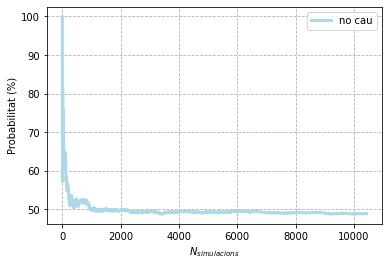

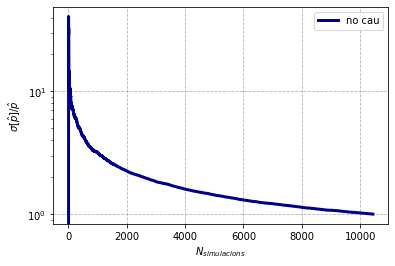

Numero simulacions: 10437
P: 48.93 ± 0.49 %
sigma(p)/p: 1.00 %


In [10]:
Ntiros=1000000

p1 = []
varp1 = []
stdp1 = []
errp1 = []

nt_t = []
results = []

for nt in range(1,Ntiros+1):

  a_1 = a1 + np.random.normal(0,0.15*a1)
  a_2 = a2 + np.random.normal(0,-0.15*a2)
  results.append(causalitat(a_1,a_2))

  p_tmp = sum(map(lambda x : x == "no cau", results))/nt
  p1.append(100.*p_tmp)
  varp1.append(p_tmp*(1-p_tmp)/nt)
  stdp1.append(np.sqrt(p_tmp*(1-p_tmp)/nt))
  errp1.append(100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp)

  nt_t.append(nt)

  if nt > 100 and 100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp< 1.: 
    break

plt.plot(nt_t,p1,label="no cau", color='lightblue',lw=3)
plt.xlabel('$N_{simulacions}$')
plt.ylabel('Probabilitat (%)')
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

plt.plot(nt_t,errp1,label="no cau", color='darkblue',lw=3)
plt.xlabel('$N_{simulacions}$')
plt.ylabel('$\sigma[\hat{p}]/\hat{p}$')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

print("Numero simulacions: {}".format(nt_t[-1]))
print("P: {0:.2f} \u00B1 {1:.2f} %".format(p1[-1],100.*stdp1[-1]))
print("sigma(p)/p: {0:.2f} %".format(errp1[-1]))